In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [21]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [22]:
x_train = x_train /255
x_test = x_test/255

In [23]:
len(x_train)

60000

In [24]:
len(x_test)

10000

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

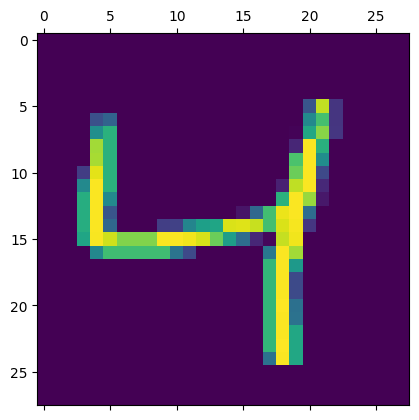

In [26]:
plt.matshow(x_train[2])

In [27]:
x_train_flattern = x_train.reshape(len(x_train),28*28)

In [28]:
x_test_flattern = x_test.reshape(len(x_test),28*28)

In [29]:
model = keras.Sequential([
  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics = ['accuracy']
)
model.fit(x_train_flattern,y_train,epochs=5)

/home/ilensys/praveen/ml/learning/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8123 - loss: 0.7217
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9134 - loss: 0.3086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9217 - loss: 0.2812
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9228 - loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9259 - loss: 0.2638


In [30]:
model.evaluate(x_test_flattern,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9128 - loss: 0.3066


[0.2705022394657135, 0.9248999953269958]

In [31]:
y_predicted = model.predict(x_test_flattern)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step


In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

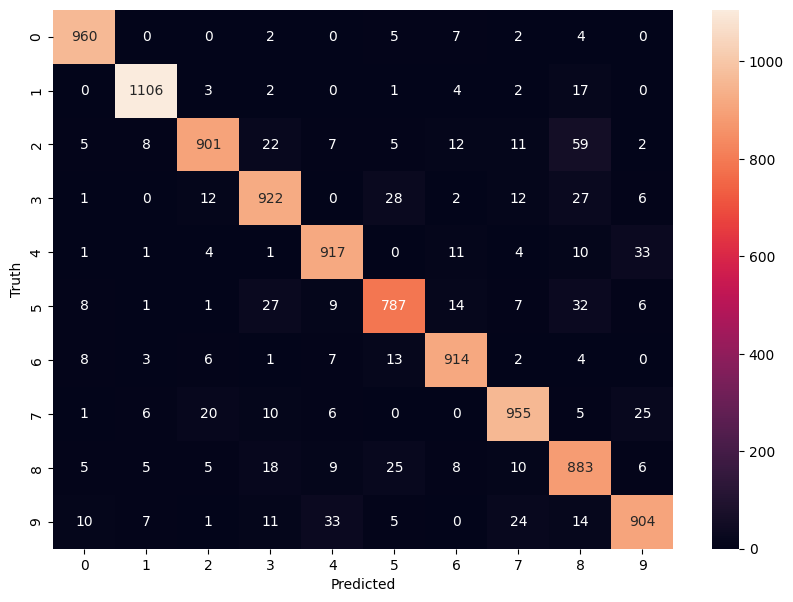

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')